In [1]:
#Imports
import pickle
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from scipy.signal import savgol_filter
import seaborn as sns

In [2]:
#del trainer
#del model
import gc
gc.collect() 
from keras import backend as K
K.clear_session()

Using TensorFlow backend.
/home/abhijit/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abhijit/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abhijit/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abhijit/anaconda3

In [ ]:
_validatedef generate_cluster_impact(fold_number, folder_name, model_name, number_of_neurons):
    method ='GMM'
    model_name = model_name
    number_of_neurons = number_of_neurons

    k = 1
    result ={}
    for i in range(1,k+1,1):
        name = '../../data/'+folder_name+'/'+str(method)+'_multi_scree_fold_'+str(i)+'_'+model_name+'.pkl'   #CHANGE
        with open(name,"rb") as f:
            result[i] = pickle.load(f)
    
    f = fold_number
    clf_result = result[f]


    fig = plt.figure(1,figsize=(9,9))
    ax1 = fig.add_subplot(111)
    
    if model_name == 'AlexNet':
        X = range(1,13,1)
    else:
        X = range(1,14,1)
    xticks = []
    x2ticks = []
    anat = []
    inat = []
    for cl in X:
        xticks.append(2**cl)
        x2ticks.append(number_of_neurons//2**cl)
        i = 0
        temp = []
        for item in clf_result[cl].keys():
            plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            temp.append(clf_result[cl][item][0])
            i += 1
        anat.append(np.max(temp))
        inat.append(np.min(temp))

    plt.plot(X,anat, color='b',linewidth=2)
    plt.plot(X,inat, color='C1',linewidth=2).i
    plt.ylim([-1,1])
    plt.xlim([1,14])
    plt.axvline(x=23 , color='black', linestyle='--',alpha=0.3)
    #ax1.set_xticks(X,X,xticks)
    plt.xticks(X,xticks)
    ax2 = ax1.twiny()
    ax2.set_xlim([1,14])
    ax2.set_xticks(X)
    ax2.set_xticklabels(x2ticks, rotation=70, minor=False)
    #ax2.set_xlabel('Average number of neurons per cluster')
    #ax1.set_xlabel('Number of cluster(s) k')
    #ax1.set_ylabel("Maximum Potential Performance Impact")
    #plt.title('Cluster Impact Plot (Animate vs Inanimate) for '+ str(model_name))
    #plt.savefig('../../results/mobilenet_cluster.png')
    plt.show()
    

In [ ]:
generate_cluster_impact(1,'pkl_mobile','MobileNetV2',5725552)_256_test_results_

In [ ]:
.igenerate_cluster_impact(1,'pkl_vgg16','VGG16',13555712)

In [ ]:
generate_cluster_impact(1,'pkl_resnet','ResNet101',31410176)

In [ ]:
generate_cluster_impact(1,'pkl_alex','AlexNet',658272)

In [ ]:
def generate_average_scree(folder_name, model_name, nof, number_of_neurons):
    method ='GMM'
    model_name = model_name

    k = nof
    noc = nof
    result ={}
    for i in range(1,k+1,1):
        name = '../../data/'+folder_name+'/'+str(method)+'_multi_scree_fold_'+str(i)+'_'+model_name+'.pkl'   #CHANGE
        with open(name,"rb") as f:
            result[i] = pickle.load(f)
            
    #Find MaxAd', MaxId' and its average
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111)
    X_avg = []
    Y_avg = [] 
    xticks = [2**i for i in range(1,14,1)]
    x2ticks = [number_of_neurons//2**i for i in range(1,14,1)]
    for i in range(1,noc+1,1):
        X = []
        Y = []
        for j in range(1,14,1):.i
            X.append(j)
            temp = []
            for key, value in result[i][j].items():
                temp.append(value[0])
            maxa = max(temp)
            maxi = min(temp)
            avg = float(maxa - maxi)
            Y.append(avg)
        #print X,Y
        X_avg.append(X)
        Y_avg.append(Y)
        plt.plot(X,Y)
        
    print(Y.index(max(Y)),2**Y.index(max(Y)))
    plt.xlim([1,14])
    ax.set_xticks(X)
    ax.set_xticklabels(xticks)
    ax2 = ax.twiny()
    ax2.set_xlim([1,14])
    ax2.set_xticks(X)
    ax2.set_xticklabels(x2ticks, rotation=70, minor=False)
    #ax2.set_xlabel('Average number of neurons per cluster')
    #plt.savefig('../../results/mobilenet_all_folds.png')

    print(len(Y_avg[0]))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x_ax = X_avg[0]
    y_ax = np.average(Y_avg,axis=0)
    plt.plot(x_ax,y_ax)
    plt.xlim([1,14])
    ax.set_xticks(X)
    ax.set_xticklabels(xticks)
    ax2 = ax.twiny()
    ax2.set_xlim([1,14])
    ax2.set_xticks(X)
    ax2.set_xticklabels(x2ticks, rotation=70, minor=False)
    ax2.set_xlabel('Average number of neurons per cluster')

    '''
    flag = 0
    if model_name == 'AlexNet':
        X = range(1,13,1)
    else:
        X = range(1,14,1)
    an_fold =[]
    ian_fold = []
    X = range(1,14,1)
    xticks = []
    x2ticks = []
    anat = []
    inat = []
    for cl in X:
        xticks.append(2**cl)
        x2ticks.append(number_of_neurons//2**cl)
        i = 0
        temp = []
        for item in clf_result[cl].keys():
            if cl == 8:
                if clf_result[cl][item][0] in pi_ana[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#800080')
                elif clf_result[cl][item][0] in pi_ina[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#15CF5F')
                else:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            else:
                plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            temp.append(clf_result[cl][item][0])
            i += 1
        anat.append(np.max(temp))
        inat.append(np.min(temp))
     
    anat_avg = np.add(anat_avg,anat)
    Y = []
   
    for i in range(1,noc+1,1):
        if i == 2:
            flag = 1
        for j in range(1,14,1):
            temp = []
            for key, value in result[i][j].items():
                temp.append(value)
            maxa = max(temp)
            maxi = min(temp)
            if flag == 0:
                an_fold.append(maxa)
                ian_fold.append(maxi)
            else:
                an_fold[j-2] += maxa
                ian_fold[j-2] = maxi

    for j in range(1,14,1):
        maxa = (an_fold[j-2]) / 4.
        maxi = (ian_fold[j-2]) /4.
    X = range(1,14,1)
    xticks = []lambda
    x2ticks = []
    anat = []
    inat = []
    for cl in X:
        xticks.append(2**cl)
        x2ticks.append(number_of_neurons//2**cl)
        i = 0
        temp = []
        for item in clf_result[cl].keys():
            if cl == 8:
                if clf_result[cl][item][0] in pi_ana[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#800080')
                elif clf_result[cl][item][0] in pi_ina[f]:
        torch.cuda.empty_cache()             plt.plot(cl,clf_result[cl][item][0],'go',color='#15CF5F')
                else:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            else:
                plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            temp.append(clf_result[cl][item][0])
            i += 1
        anat.append(np.max(temp))
        inat.append(np.min(temp))
     
    anat_avg = np.add(anat_avg,anat)
        diff = maxa - maxi
        Y.append(diff)
        
    x_sm =[]
    for i in X:
        x_sm.append(i)
    x_sm = np.array(x_sm)
    y_sm = np.array(Y)
    if len(y_sm) %2==0:
        wl = len(y_sm) - 1
    else:
        wl = len(y_sm) - 2
    x_smooth = np.linspace(x_sm.min(), x_sm.max(), len(y_sm))
    yhat = savgol_filter(y_sm,wl , 3) # window size 51, polynomial order 3
    
    plt.figure()
    plt.plot(x_sm, y_sm, 'grey', linewidth=4)
    plt.plot(np.where(y_sm==(max(y_sm)))[0],max(y_sm),'o',c='black',markersize=10)
    #plt.xlabel('Number of cluster(s) k')
    #plt.ylabel("Average Performance")
    print(max(y_sm), 2**(Y.index(max(Y))+0), Y.index(max(Y)),max(yhat),y_sm)
    '''
    plt.show()

In [ ]:
generate_average_scree('pkl_mobile','MobileNetV2',4,5725552)

In [ ]:
.igenerate_average_scree('pkl_vgg16','VGG16',3,13555712)

In [ ]:
%time
layer_info = {}
#Comparing Layer lesions
classes = ['animate','inanimate']

for label in [ana,ina]:
    
    layer_info[label] = {}
    #Before lesion
    #print('Pre-layer-lesioning')
    #print('Label:',label)
    #print('Layer:',layer)

    pred = clf.predict(X_new)
    loc = np.where(pred==label)[0]
    loc_new =[]
    for i in range(len(loc)):
        temp = np.where(pred_kmeans==loc[i])[0]
        loc_new.extend(temp)

    lambda_mask = np.ones(shape=((5725552,)))
    print('no', len(loc_new))
    model = MobileNetV2( input_shape=None, alpha=0.35,include_top=True, 
                    weights="imagenet",input_tensor=None, pooling=None, 
                    classifier_activation="softmax", classes=1000, lambda_mask=lambda_mask)
    flag = 0
    dprime = 0.
    for p in classes:
        im_valid_test = []
        image_list_valid = '../../data/pkl_mobile/'+p+'_MobileNetV2_image_list_test.txt'
        with open(image_list_valid,'r') as f:
            for line in f.readlines():
                im_valid_test.append(line.strip('\n'))
        im_temp = preprocess_image_batch(im_valid_test,img_size=(256,256), crop_size=(224,224), color_mode="rgb")
        out = model.predict(im_temp,batch_size=64)

        true_valid_wids = []
        for i in im_valid_test:
                temp1 = i.split('/')[4]
                temp = temp1.split('.')[0].split('_')[2]
                true_valid_wids.append(truth[int(temp)][1])

        predicted_valid_wids = []
        for i in range(len(im_valid_test)):
            #print im_list[i], pprint_output(out[i]), true_wids[i]
            predicted_valid_wids.append(pprint_output(out[i]))

        count, error  = top5accuracy(true_valid_wids, predicted_valid_wids)

        print(str(p)+' '+str(count)+' '+str(len(im_valid_test))+' '+str(error)+' '+str(1-error))

        if flag == 0:
            dprime = error
            flag = 1
        else:
            dprime -= error
    print('No Lesion: ',dprime)
    layer_info[label]['no'] = dprime   
    keras.backend.clear_session()
    gc.collect()
    del model

    #Before lesion
    #print('Pre-layer-lesioning')
    #print('Label:',label)
    #print('Layer:',layer)

    pred = clf.predict(X_new)
    loc = np.where(pred==label)[0]
    loc_new =[]
    for i in range(len(loc)):
        temp = np.where(pred_kmeans==loc[i])[0]
        loc_new.extend(temp)

    lambda_mask = np.ones(shape=((5725552,)))
    lambda_mask[loc_new] = 0.
    print('pre-loc', len(loc_new))
    model = MobileNetV2( input_shape=None, alpha=0.35,include_top=True, 
                    weights="imagenet",input_tensor=None, pooling=None, 
                    classes=1000, classifier_activation="softmax", lambda_mask=lambda_mask)
    flag = 0
    dprime = 0.
    for p in classes:
        im_valid_test = []
        image_list_valid = '../../data/pkl_mobile/'+p+'_MobileNetV2_image_list_test.txt'
        with open(image_list_valid,'r') as f:
            for line in f.readlines():
                im_valid_test.append(line.strip('\n'))
        im_temp = preprocess_image_batch(im_valid_test,img_size=(256,256), crop_size=(224,224), color_mode="rgb")
        out = model.predict(im_temp,batch_size=64)

        true_valid_wids = []
        for i in im_valid_test:
                temp1 = i.split('/')[4]
                temp = temp1.split('.')[0].split('_')[2]
                true_valid_wids.append(truth[int(temp)][1])

        predicted_valid_wids = []
        for i in range(len(im_valid_test)):
            #print im_list[i], pprint_output(out[i]), true_wids[i]
            predicted_valid_wids.append(pprint_output(out[i]))

        count, error  = top5accuracy(true_valid_wids, predicted_valid_wids)

        print(str(p)+' '+str(count)+' '+str(len(im_valid_test))+' '+str(error)+' '+str(1-error))

        if flag == 0:
            dprime = error
            flag = 1
        else:
            dprime -= error
    print('Cluster Only: ',dprime)
    layer_info[label]['pre'] = dprime   
    keras.backend.clear_session()
    gc.collect()
    del model

    #After lesion
    #print('Pre-layer-lesioning')
    #print('Label:',label)
    #print('Layer:',layer)

    pred = clf.predict(X_new)
    loc = np.where(pred==label)[0]
    loc_new =[]
    for i in range(len(loc)):
        temp = np.where(pred_kmeans==loc[i])[0]
        loc_new.extend(temp)

    lambda_mask = np.ones(shape=((5725552,)))
    number = len(loc_new)
    if label == ana:
        lambda_mask[index_ana[0:number]] = 0.
    elif label == ina:
        lambda_mask[index_ina[0:number]] = 0.

    print('lrp-loc', len(loc_new))
    model = MobileNetV2( input_shape=None, alpha=0.35,include_top=True, 
                    weights="imagenet",input_tensor=None, pooling=None, 
                    classes=1000, classifier_activation="softmax", lambda_mask=lambda_mask)
    flag = 0
    dprime = 0.
    for p in classes:
        im_valid_test = []
        image_list_valid = '../../data/pkl_mobile/'+p+'_MobileNetV2_image_list_test.txt'
        with open(image_list_valid,'r') as f:
            for line in f.readlines():
                im_valid_test.append(line.strip('\n'))
        im_temp = preprocess_image_batch(im_valid_test,img_size=(256,256), crop_size=(224,224), color_mode="rgb")
        out = model.predict(im_temp,batch_size=64)

        true_valid_wids = []
        for i in im_valid_test:
                temp1 = i.split('/')[4]
                temp = temp1.split('.')[0].split('_')[2]
                true_valid_wids.append(truth[int(temp)][1])

        predicted_valid_wids = []
        for i in range(len(im_valid_test)):
            #print im_list[i], pprint_output(out[i]), true_wids[i]
            predicted_valid_wids.append(pprint_output(out[i]))

        count, error  = top5accuracy(true_valid_wids, predicted_valid_wids)

        print(str(p)+' '+str(count)+' '+str(len(im_valid_test))+' '+str(error)+' '+str(1-error))

        if flag == 0:
            dprime = error
            flag = 1
        else:
            dprime -= error
    print('LRP Only: ',dprime)
    layer_info[label]['lrp'] = dprime   
    keras.backend.clear_session()
    gc.collect()
    del model
    
    '''
    #Random Lesion
    # print('Post-layer-lesioning')
    #print('Label:',label)
    #print('Layer:',layer)
    pred = clf.predict(X_new)
    loc = np.where(pred==label)[0]
    loc_new =[]
    for i in range(len(loc)):
        temp = np.where(pred_kmeans==loc[i])[0]
        loc_new.extend(temp)
    
    loc_new2 = np.random.randint(start,end,len(loc_new))

    lambda_mask = np.ones(shape=((5725552,)))
    lambda_mask[loc_new] = 0.

   
    lambda_mask = np.ones(shape=((5725552,)))
    lambda_mask[loc_new2] = 0.
    print('post-rand-loc', len(loc_new))
    model = MobileNetV2( input_shape=None, alpha=0.35,include_top=True, 
                    weights="imagenet",input_tensor=None, pooling=None, 
                    classes=1000, classifier_activation="softmax", lambda_mask=lambda_mask)

    flag = 0
    dprime = 0.
    for p in classes:
        im_valid_test = []
        image_list_valid = '../../data/pkl_mobile/'+p+'_MobileNetV2_image_list_test.txt'
        with open(image_list_valid,'rb') as f:
            for line in f.readlines():
                im_valid_test.append(line.strip('\n'))
        im_temp = preprocess_image(im_valid_test,227,227, color_mode="bgr")
        out = model.predict(im_temp,batch_size=64)

        true_valid_wids = []
        for i in im_valid_test:
                temp1 = i.split('/')[4]
                temp = temp1.split('.')[0].split('_')[2]
                true_valid_wids.append(truth[int(temp)][1])

        predicted_valid_wids = []
        for i in range(len(im_valid_test)):
            #print im_list[i], pprint_output(out[i]), true_wids[i]
            predicted_valid_wids.append(pprint_output(out[i]))

        count, error  = top5accuracy(true_valid_wids, predicted_valid_wids)

        print str(p)+' '+str(count)+' '+str(len(im_valid_test))+' '+str(error)+' '+str(1-error)

        if flag == 0:
            dprime = error
            flag = 1
        else:
            dprime -= error
    print('Random: ',dprime)
    layer_info[label]['rand'] = dprime   
    keras.backend.clear_session()
    gc.collect()
    del model
    '''generate_average_scree('pkl_resnet','ResNet101', 4, 31410176)torch.cuda.empty_cache() 

In [ ]:
generate_average_scree('pkl_alex','AlexNet')

In [ ]:
def generate_cluster_impact_class(fold_number, folder_name, modmodel perfromance based on ablationsel_name, number_of_neurons):
    method ='GMM'
    model_name = model_name
    number_of_neurons = number_of_neurons

    k = 1
    result ={}
    for i in range(1,k+1,1):
        name = '../../data/'+folder_name+'/'+str(method)+'_multi_scree_fold_'+str(i)+'_'+model_name+'.pkl'   #CHANGE
        with open(name,"rb") as f:
            result[i] = pickle.load(f)
    
    f = fold_number
    clf_result = result[f]


    fig = plt.figure(1,figsize=(9,9))
    ax1 = fig.add_subplot(111)torch.cuda.empty_cache() 
    
    if model_name == 'AlexNet':
        X = range(1,13,1)
    X = range(1,14,1)
    xticks = []
    x2ticks = []
    anat = []
    inat = []
    for cl in X:
        xticks.append(2**cl)
        x2ticks.append(number_of_neurons//2**cl)
        i = 0
        temp = []
        for item in clf_result[cl].keys():
            if cl == 8:.i
                if clf_result[cl][item][0] in pi_ana[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#800080')
                elif clf_result[cl][item][0] in pi_ina[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#15CF5F')
                else:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            else:
                plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            temp.append(clf_result[cl][item][0])
            i += 1
        anat.append(np.max(temp))
    X = range(1,14,1)
    xticks = []
    x2ticks = []
    anat = []
    inat = []
    for cl in X:
        xticks.append(2**cl)
        x2ticks.append(number_of_neurons//2**cl)
        i = 0
        temp = []
        for item in clf_result[cl].keys():
            if cl == 8:
                if clf_result[cl][item][0] in pi_ana[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#800080')
                elif clf_result[cl][item][0] in pi_ina[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#15CF5F')
                else:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            else:
                plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            temp.append(clf_result[cl][item][0])
            i += 1
        anat.append(np.max(temp))
        inat.append(np.min(temp))
     torch.cuda.empty_cache() 
    anat_avg = np.add(anat_avg,anat)
        inat.append(np.min(temp))
     
    anat_avg = np.add(anat_avg,anat)
    else:
        X = range(1,14,1)
    xticks = []
    x2ticks = []
    anat = []
    inat = []
    for cl in X:
        xticks.append(2**cl)
        x2ticks.append(number_of_neurons//2**cl)
        i = 0
        temp = []
        for item in clf_result[cl].keys():
            plt.plot(cl,clf_result[cl][item],'go',color='grey',alpha=0.2)
            temp.append(clf_result[cl][item])
            i += 1
        anat.append(np.max(temp))
        inat.append(np.min(temp))

    plt.plot(X,anat, color='b',linewidth=2)
    plt.plot(X,inat, color='C1',linewidth=2)
    plt.ylim([-1,1])
    plt.xlim([1,14])
    plt.axvline(x=23 , color='black', linestyle='--',alpha=0.3)
    #ax1.set_xticks(X,X,xticks)
    plt.xticks(X,xticks)
    ax2 = ax1.twiny()
    ax2.set_xlim([1,14])
    ax2.set_xticks(X)
    ax2.set_xticklabels(x2ticks, rotation=70, minor=False)
    ax2.set_xlabel('Average number of neurons per cluster')
    ax1.set_xlabel('Number of cluster(s) k')
    ax1.set_ylabel("Maximum Potential Performance Impact")
    plt.title('Cluster Impact Plot (Animate vs Inanimate) for '+ str(model_name))
    plt.show()model perfromance based on ablations
    

In [ ]:
generate_cluster_impact_class(1,'pkl_mobile','MobileNetV2',5725552)

In [ ]:
model_name = 'MobileNetV2'fig, ax = plt.subplots(figsize=(9,9))
    X = range(1,14,1)
    xticks = []
    x2ticks = []
    anat = []
    inat = []
    for cl in X:
        xticks.append(2**cl)
        x2ticks.append(number_of_neurons//2**cl)
        i = 0
        temp = []
        for item in clf_result[cl].keys():
            if cl == 8:
                if clf_result[cl][item][0] in pi_ana[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#800080')
                elif clf_result[cl][item][0] in pi_ina[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#15CF5F')
                else:
                    plt.pllambdaot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            else:
                plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            temp.append(clf_result[cl][item][0])
            i += 1
        anat.append(np.max(temp))
        inat.append(np.min(temp))
     
    anat_avg = np.add(anat_avg,anat)
folder='pkl_mobile_1'
method = 'GMM'
with open('../../data/'+folder+'/'+str(method)+'_four_fold_results_'+model_name+'.pkl', 'rb') as handle:
    result_validate = pickle.load(handle)


In [ ]:
from functools import reduce
import itertools
fold = 1
loc_ana = {}
loc_ina = {}
pi_ana = {}
pi_ina = {}
loc_ana_avg = []
loc_ina_avg = []
for i in range(1):
    pi_scores = [result[fold][8][i] for i in result[fold][8].keys()]
    ana = int(list(pi_scores).index(max(pi_scores)))model perfromance based on ablations
    ina = int(list(pi_scores).index(min(pi_scores)))
    ana = sorted(range(len(pi_scores)), key=lambda i: pi_scores[i],reverse=True)[0:5]
    ina = sorted(range(len(pi_scores)), key=lambda i: pi_scores[i])[0:13]
    pi_ana[fold] = [result[fold][8][i] for i in ana]
    pi_ina[fold] = [result[fold][8][i] for i in ina]
    #print(fold, ana, ana_mppi_score)
    #print('####',fold, ina, ina_mppi_score)
    #print(fold, ina, [result_validate[fold][256][i][1] for i in ina])
    #loc_ana[fold] =  list(itertools.chain.from_iterable([result[fold][8][i][1] for i in ana]))
    #loc_ina[fold] = list(itertools.chain.from_iterable([result[fold][8][i][1] for i in ina]))
    fold+=1
#loc_ana_avg = list(reduce(set.intersection, [set(item) for item in loc_ana.values()]))
#loc_ina_avg = list(redutorch.cuda.empty_cache() ce(set.intersection, [set(item) for item in loc_ina.values()]))
#print(len(loc_ana_avg),len(loc_ina_avg))

In [3]:
#Code to generate average scree plot
model_name = 'MobileNetV2'
method = 'GMM'
folder_name='pkl_mobile'
number_of_neurons = 5725552
k = 4
result ={}
for i in range(1,k+1,1):
    name = '../../data/'+folder_name+'/'+str(method)+'_multi_scree_fold_'+str(i)+'_'+model_name+'.pkl'   #CHANGE
    with open(name,"rb") as f:
        result[i] = pickle.load(f)

In [ ]:
result[2].keys()

In [9]:
from functools import reduce
import itertools
fold = 1
loc_ana = {}
loc_ina = {}
pi_ana = {}
pi_ina = {}
loc_ana_avg = []
loc_ina_avg = []
for i in range(4):
    pi_scores = [i[0] for i in result[fold][8].values()]
    pi_scores_ina = [i[0] for i in result[fold][9].values()]
    #ana = int(list(pi_scores).index(max(pi_scores)))
    #ina = int(list(pi_scores).index(min(pi_scores)))
    ana = sorted(range(len(pi_scores)), key=lambda i: pi_scores[i],reverse=True)[0:12]
    ina = sorted(range(len(pi_scores)), key=lambda i: pi_scores_ina[i])[0:50]
    pi_ana[fold] = [result[fold][8][i][0] for i in ana]
    pi_ina[fold] = [result[fold][9][i][0] for i in ina]
    #print(fold, ana, ana_mppi_score)
    #print('####',fold, ina, ina_mppi_score)
    #print(fold, ina, [result_validate[fold][256][i][1] for i in ina])
    loc_ana[fold] =  list(itertools.chain.from_iterable([result[fold][8][i][1] for i in ana]))
    loc_ina[fold] = list(itertools.chain.from_iterable([result[fold][9][i][1] for i in ina]))
    fold+=1
loc_ana_avg = list(reduce(set.intersection, [set(item) for item in loc_ana.values()]))
loc_ina_avg = list(reduce(set.intersection, [set(item) for item in loc_ina.values()]))
print(len(loc_ana_avg),len(loc_ina_avg))

17637 18193


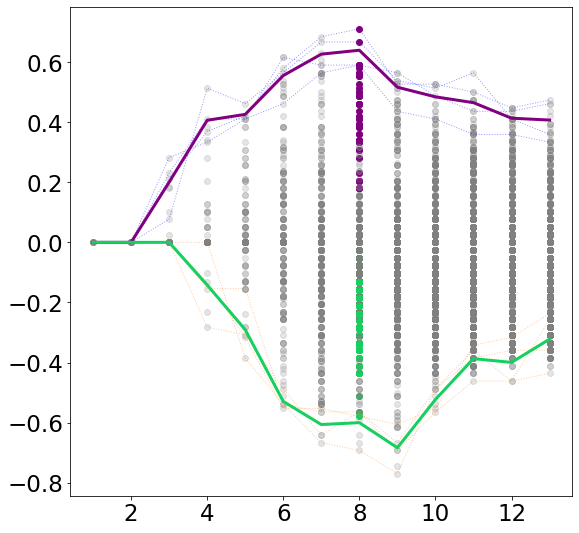

In [10]:
import gc
keras.backend.clear_session()
gc.collect()
del modelfig = plt.figure(1,figsize=(9,9))
ax1 = fig.add_subplot(111)
anat_avg = np.zeros(13,)
inat_avg = np.zeros(13,)
for f in range(1,5,1):
    clf_result = result[f]
    X = range(1,14,1)
    xticks = []
    x2ticks = []
    anat = []
    inat = []
    for cl in X:
        xticks.append(2**cl)
        x2ticks.append(number_of_neurons//2**cl)
        i = 0
        temp = []
        for item in clf_result[cl].keys():
            if cl == 8:
                if clf_result[cl][item][0] in pi_ana[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#800080')
                elif clf_result[cl][item][0] in pi_ina[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#15CF5F')
                else:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            else:
                plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            temp.append(clf_result[cl][item][0])
            i += 1
        anat.append(np.max(temp))
        inat.append(np.min(temp))
     
    anat_avg = np.add(anat_avg,anat)
    inat_avg = np.add(inat_avg,inat)
    plt.plot(X,anat, color='b',linewidth=1, alpha=0.4,linestyle='dotted')
    plt.plot(X,inat, color='C1',linewidth=1,alpha=0.4,linestyle='dotted')

for i in range(13):
    anat_avg[i] = anat_avg[i] / 4.
    inat_avg[i] = inat_avg[i] / 4.
    
plt.plot(X,anat_avg, color='#800080',linewidth=3,label='Animate')
plt.plot(X,inat_avg, color='#15CF5F',linewidth=3, label ='Inanimate')

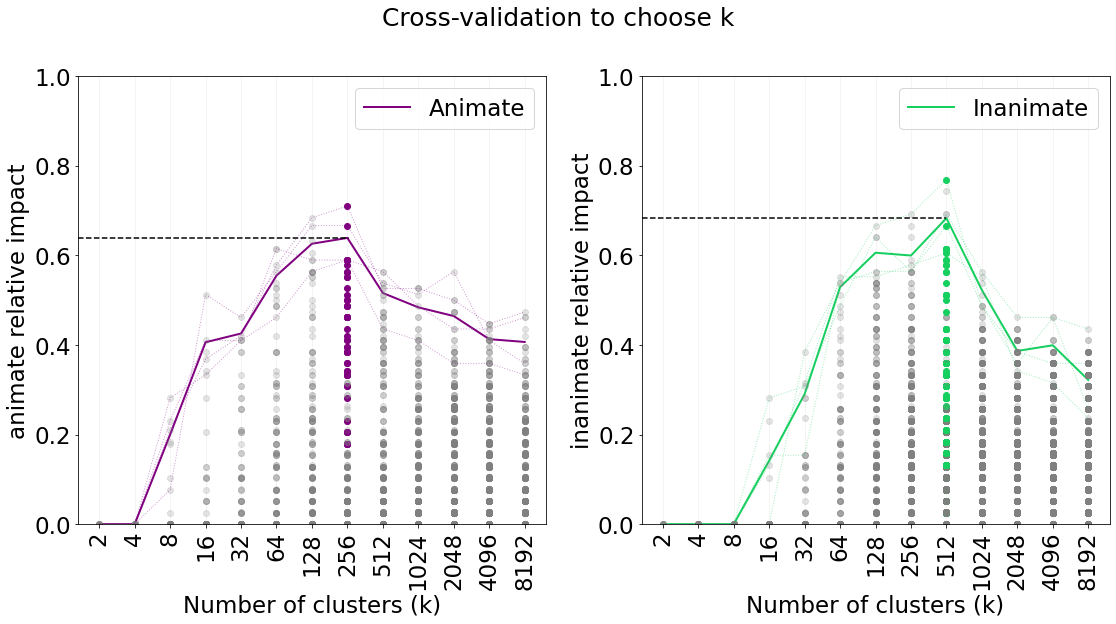

In [11]:
fig, ax = plt.subplots(figsize=(16,9))
matplotlib.rcParams["font.size"] = 23
fig.suptitle('Cross-validation to choose k', fontsize=25)


plt.subplot(1, 2, 1)
plt.plot(range(1,14,1), anat_avg, color='#800080', linewidth=2, label='Animate')
plt.grid(axis='x', color='0.95')
plt.xticks(range(1,14,1),xticks, rotation=90)
plt.axhline(y=max(anat_avg), color='black', linestyle='--', xmin=0, xmax=0.58)
plt.ylim([0,1])
plt.ylabel('animate relative impact')
plt.xlabel('Number of clusters (k)')

for f in range(1,5,1):
    clf_result = result[f]
    X = range(1,14,1)
    anat = []
    for cl in X:
        i = 0
        temp =[]
        for item in clf_result[cl].keys():
            if cl == 8:
                if clf_result[cl][item][0] in pi_ana[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='#800080')
                else:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            else:
                plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            i += 1
            temp.append(clf_result[cl][item][0])
        anat.append(np.max(temp))
    plt.plot(range(1,14,1),anat, color='#800080',linewidth=1, alpha=0.4,linestyle='dotted')
plt.legend()

inat_avg_pos = -1 * inat_avg
plt.subplot(1, 2, 2)
plt.plot(range(1,14,1), inat_avg_pos, color='#15CF5F', linewidth=2, label='Inanimate')
plt.grid(axis='x', color='0.95')
plt.xticks(range(1,14,1),xticks, rotation=90)
plt.axhline(y=max(inat_avg_pos), color='black', linestyle='--', xmin=0, xmax=0.65)
plt.ylabel('inanimate relative impact')
plt.xlabel('Number of clusters (k)')
plt.ylim([0,1])

for f in range(1,5,1):
    clf_result = result[f]
    X = range(1,14,1)
    inat = []
    for cl in X:
        i = 0
        temp =[]
        for item in clf_result[cl].keys():
            if cl == 9:
                if clf_result[cl][item][0] in pi_ina[f]:
                    plt.plot(cl,-1*clf_result[cl][item][0],'go',color='#15CF5F')
                else:
                    plt.plot(cl,-1*clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            else:
                plt.plot(cl,-1*clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            i += 1
            temp.append(-1*clf_result[cl][item][0])
        inat.append(np.max(temp))
    plt.plot(range(1,14,1),inat, color='#15CF5F',linewidth=1, alpha=0.4,linestyle='dotted')
plt.legend()

plt.tight_layout()
plt.savefig('../../results/mobile_cross_fold.png')

In [ ]:
inat_avg

In [ ]:
plt.plot(X,anat_avg, color='#800080',linewidth=3,label='Animate')
plt.plot(X,inat_avg, color='#15CF5F',linewidth=3, label ='Inanimate')
plt.ylim([-1,1])
plt.xlim([1,14])
plt.axvline(x=23 , color='black', linestyle='--')
ax1.set_yticklabels([])
plt.xticks(X,[])
#ax2 = ax1.twiny()
#ax2.set_xlim([1,14])
#ax2.set_xticks(X)
#ax2.set_xticklabels([], rotation=70, minor=False)
#ax2.set_xlabel('Average number of neurons permatplotlib.rcParams["font.size"] = 23 cluster')
ax1.set_xlabel('number of clusters (k)')
ax1.set_ylabel("performance impact (MPPI)")
matplotlib.rcParams["font.size"] = 23
plt.title('Cross-validation to choose k')
plt.legend()
plt.savefig('../../results/mobile_scree.png')
plt.show()

In [ ]:
labels = ['No ablation', 'animate\nablation', 'inanimate \nablation']
men_means = [89.74, 17.94, 64.10 ]
women_means = [84.61, 89.74, 5.12]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9,9))
rects1 = ax.bar(x - width/2, men_means, width, color='#800080',label='Animate')
rects2 = ax.bar(x + width/2, women_means, width,color='#15CF5F', label='Inanimate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('top-5 accuracy (%)')
ax.set_title('Performance deficit')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticklabels([0,20,40,60,80,100])
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.ylim([0,100])

autolabel(rects1)
autolabel(rects2)
matplotlib.rcParams["font.size"] = 23
#fig.tight_layout()
plt.savefig('../../results/performance_hist.png', bbox_inches="tight")

In [ ]:
plt.savefig('../../results/mobile_scree.png')

In [ ]:
#Code to generate average scree plot
model_name = 'MobileNetV2'
method = 'GMM'
folder_name='pkl_mobile_3'
number_of_neurons = 5725552
k = 4
result ={}
for i in range(1,k+1,1):
    name = '../../data/'+folder_name+'/'+str(method)+'_multi_scree_fold_'+str(i)+'_'+model_name+'.pkl'   #CHANGE
    with open(name,"rb") as f:
        result[i] = pickle.load(f)
        fig = plt.figure(1,figsize=(9,9))
        
ax1 = fig.add_subplot(111)
anat_avg = np.zeros(2,)
inat_avg = np.zeros(2,)
for f in range(1,5,1):
    clf_result = result[f]
    X = range(7,9,1)
    xticks = []
    x2ticks = []
    anat = []
    inat = []
    for cl in X:
        xticks.append(2**cl)
        x2ticks.append(number_of_neurons//2**cl)
        i = 0
        temp = []
        for item in clf_result[cl].keys():
            if cl == 7:
                if clf_result[cl][item][0] in pi_ana[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='b',alpha=0.2)
                elif clf_result[cl][item][0] in pi_ina[f]:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='C1',alpha=0.2)
                else:
                    plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            else:
                plt.plot(cl,clf_result[cl][item][0],'go',color='grey',alpha=0.2)
            temp.append(clf_result[cl][item][0])
            i += 1
        anat.append(np.max(temp))
        inat.append(np.min(temp))
     
    anat_avg = np.add(anat_avg,anat)
    inat_avg = np.add(inat_avg,inat)
    #plt.plot(X,anat, color='b',linewidth=1, alpha=0.4,linestyle='dotted')
    #plt.plot(X,inat, color='C1',linewidth=1,alpha=0.4,linestyle='dotted')

for i in range(2):
    anat_avg[i] = anat_avg[i] / 4.
    inat_avg[i] = inat_avg[i] / 4.
    
#plt.plot(X,anat_avg, color='b',linewidth=3)
#plt.plot(X,inat_avg, color='C1',linewidth=3)
plt.ylim([-1,1])
plt.xlim([6,9])
plt.axvline(x=23 , color='black', linestyle='--')
#ax1.set_xticks(X,X,xticks)
plt.xticks(X,xticks)
ax2 = ax1.twiny()
ax2.set_xlim([6,9])
ax2.set_xticks(X)
ax2.set_xticklabels(x2ticks, rotation=70, minor=False)
#ax2.set_xlabel('Average number of neurons per cluster')
#ax1.set_xlabel('Number of cluster(s) k')
#ax1.set_ylabel("Maximum Potential Performance Impact")
#plt.title('Cluster Impact Plot (Animate vs Inanimate) for '+ str(model_name))
plt.savefig('../../results/'+folder+'mobile_scree.png')
#plt.show()